In [1]:
!pip install qutip
!pip install cplot
!pip install matplotlib

from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cplot as cplt
import matplotlib as mpl
from matplotlib import cm

from pylab import *
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.2 MB/s eta 0:00:00


**Code 2**

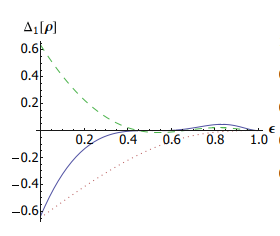

 Red dotted line: m = 1; green dashed line: m = 2; blue solid line: m = 3.

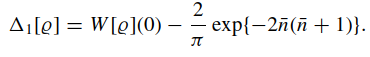

W(0) is the Wigner function at the origin

اینجا هم باید تحول زمانی تابع ویگنر در مبدا رو داشته باشیم و با استفاده از اون  کمیت دلتا رو محاسبه کنیم.

In [ ]:
N = 50
m = 1

a = qutip.destroy(N)
psi = qutip.fock(N, m).unit()

n = qutip.expect(a.dag() * a, psi)
n_term = (2 / np.pi) * np.exp(-2 * n * (1 + n))

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
gamma = X + 1j * Y
epsilon_values = np.linspace(0.001, 1, 50)
delta_values = []

W0 = qutip.wigner(psi, x, y)

def wigner_integrand(ksi, gamma_value, W0, epsilon):

    return (1 / np.pi) * np.exp((-2 / epsilon) * np.abs(ksi - gamma_value * np.sqrt(1 - epsilon))**2) * W0

for epsilon in epsilon_values:
    W = np.zeros_like(W0, dtype=complex)
    for i in range(len(x)):
        for j in range(len(y)):
            gamma_value = gamma[i, j]
            integrand_vals = wigner_integrand(gamma_value, gamma, W0, epsilon)
            W[i, j] = (2 / epsilon) * integrate.simpson(
                integrate.simpson(integrand_vals, x), y
            )

    center_index = len(x) // 2
    delta = W[center_index, center_index] - n_term
    delta_values.append(delta)

plt.plot(epsilon_values, delta_values, label=' m=1')
plt.xlabel('$\\epsilon$')
plt.ylabel('$\\delta(\\epsilon)$')
plt.legend()

plt.show()